In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [2]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    ------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
    
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

# Separating half-moon shapes

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [5]:
X, y = make_moons(n_samples=100, random_state=123)

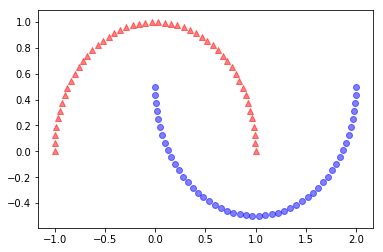

In [7]:
mask = np.array(y==0)
plt.scatter(X[mask, 0], X[mask, 1],
           color='red', marker='^', alpha=.5)
mask = np.array(y==1)
plt.scatter(X[mask, 0], X[mask, 1],
           color='blue', marker='o', alpha=.5)
plt.show()

In [8]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

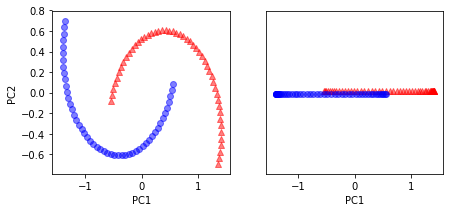

In [9]:
mask_0 = np.array(y==0)
mask_1 = np.array(y==1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[mask_0, 0], X_spca[mask_0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[mask_1, 0], X_spca[mask_1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[mask_0, 0], np.zeros((50,1))+.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[mask_1, 0], np.zeros((50,1))-.02, color='blue', marker='o', alpha=.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [10]:
from matplotlib.ticker import FormatStrFormatter

In [11]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

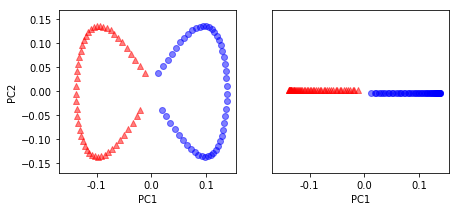

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[mask_0, 0], X_kpca[mask_0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[mask_1, 0], X_kpca[mask_1, 1], color='blue', marker='o', alpha=.5)

ax[1].scatter(X_kpca[mask_0, 0], np.zeros((50,1))+.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[mask_1, 0], np.zeros((50,1))-.02, color='blue', marker='o', alpha=.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.show()

# Separating concentric circles

In [13]:
from sklearn.datasets import make_circles

In [14]:
X, y = make_circles(n_samples=1000, random_state=123, noise=.1, factor=.2)

In [15]:
mask_0 = np.array(y==0)
mask_1 = np.array(y==1)

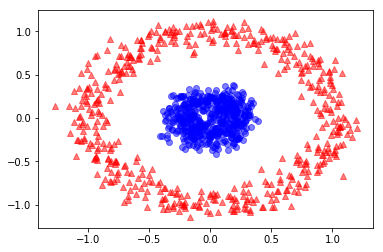

In [16]:
plt.scatter(X[mask_0, 0], X[mask_0, 1], color='red', marker='^', alpha=.5)
plt.scatter(X[mask_1, 0], X[mask_1, 1], color='blue', marker='o', alpha=.5)
plt.show()

In [17]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

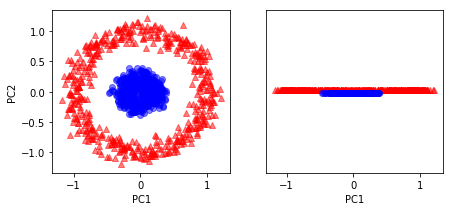

In [18]:
mask_0 = np.array(y==0)
mask_1 = np.array(y==1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[mask_0, 0], X_spca[mask_0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[mask_1, 0], X_spca[mask_1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[mask_0, 0], np.zeros((500,1))+.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[mask_1, 0], np.zeros((500,1))-.02, color='blue', marker='o', alpha=.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [19]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

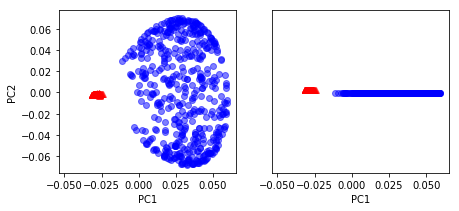

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[mask_0, 0], X_kpca[mask_0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[mask_1, 0], X_kpca[mask_1, 1], color='blue', marker='o', alpha=.5)

ax[1].scatter(X_kpca[mask_0, 0], np.zeros((500,1))+.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[mask_1, 0], np.zeros((500,1))-.02, color='blue', marker='o', alpha=.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

# Projecting new data points

In [21]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    ------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
    
    lambdas: list
        Eigenvalues
        
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components+1)]
    
    return alphas, lambdas

In [22]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [24]:
x_new = X[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [25]:
x_proj = alphas[25] # original projection
x_proj

array([ 0.07877284])

In [26]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas/lambdas)

In [28]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([ 0.07877284])

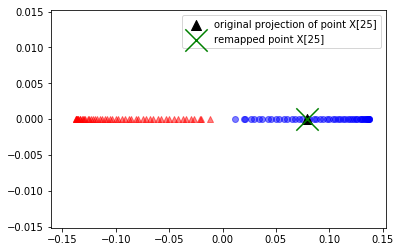

In [29]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^',alpha=0.5)

plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)

plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]', marker='^', s=100)

plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)

plt.legend(scatterpoints=1)

plt.show()

# Kernel PCA in scikit-learn

In [31]:
from sklearn.decomposition import KernelPCA

In [32]:
X, y = make_moons(n_samples=100, random_state=123)

In [33]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

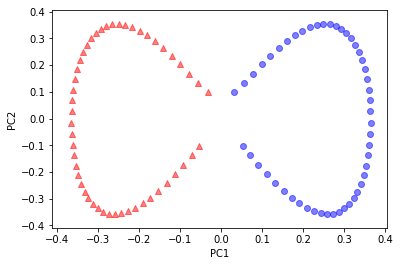

In [34]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()